# EDA

learn EDA from https://www.kaggle.com/code/dyutidasmahaptra/advanced-eda-tutorial-for-spaceship-titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno
import textwrap

In [3]:
# Set up visualization style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', 50)
sns.set_palette("pastel")

# Load the dataset
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

# Combine train and test for comprehensive EDA (excluding target)
all_data = pd.concat([train_df.drop('Transported', axis=1), test_df], axis=0).reset_index(drop=True)

In [5]:
print(f"\nTrain shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"Combined data shape: {all_data.shape}")


Train shape: (8693, 14)
Test shape: (4277, 13)
Combined data shape: (12970, 13)


In [6]:
print("\nData types:")
print(train_df.dtypes)


Data types:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [7]:
print("\nNumerical features summary:")
train_df.describe()


Numerical features summary:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
print("\nCategorical features summary:")
train_df.describe(include=['object', 'bool'])


Categorical features summary:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,False,Anton Woody,True
freq,1,4602,5439,8,5915,8291,2,4378


In [9]:
print("\nMissing values in train data:")
print(train_df.isnull().sum())

print("\nMissing values in test data:")
print(test_df.isnull().sum())


Missing values in train data:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Missing values in test data:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


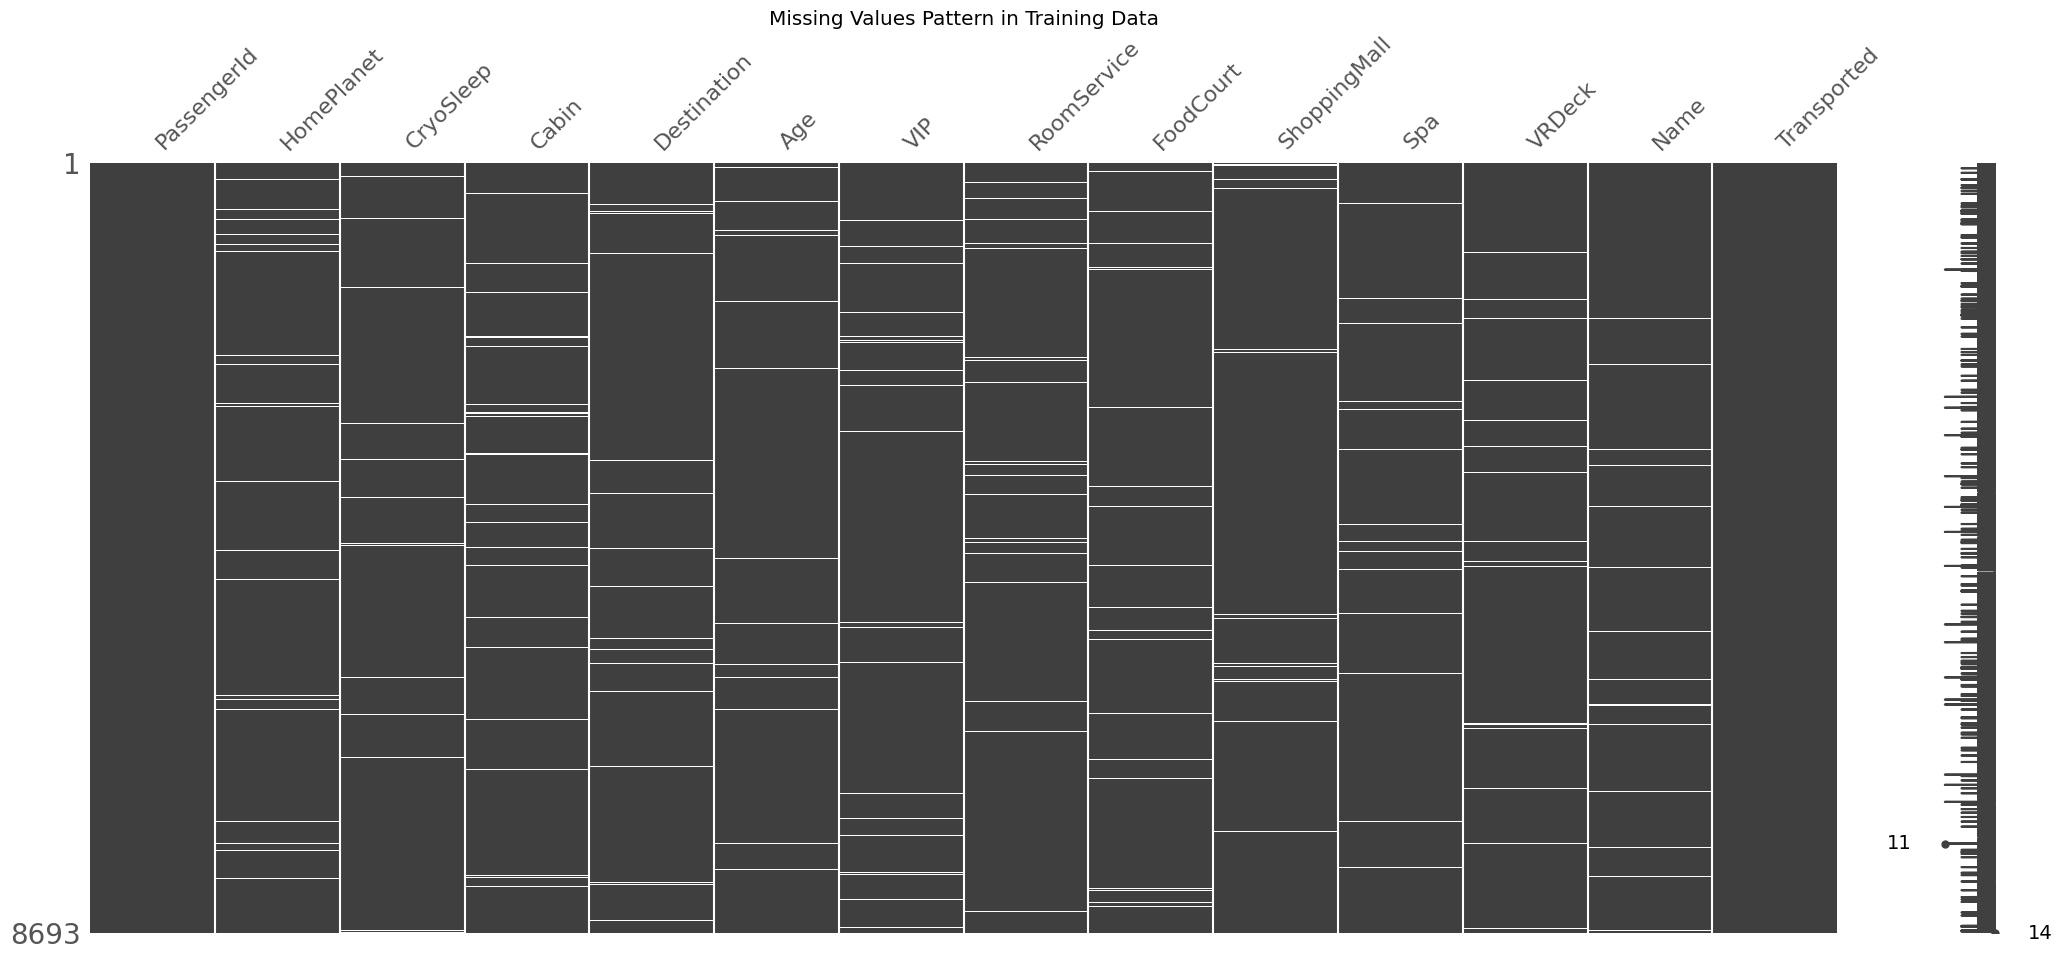

In [10]:
msno.matrix(train_df)
plt.title("Missing Values Pattern in Training Data")
plt.show()

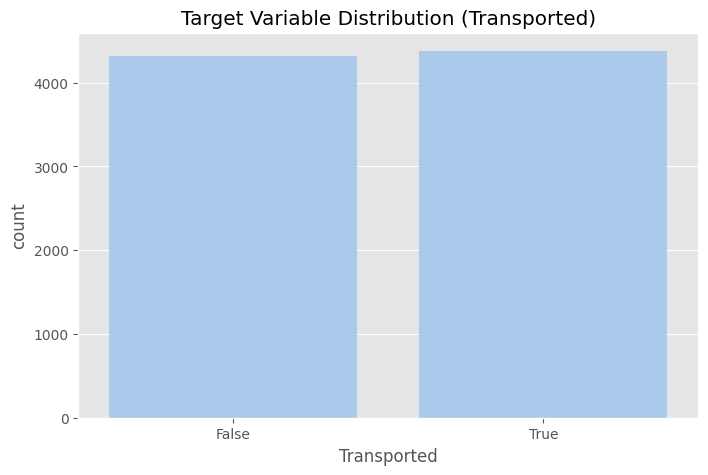

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Transported', data=train_df)
plt.title("Target Variable Distribution (Transported)")
plt.show()

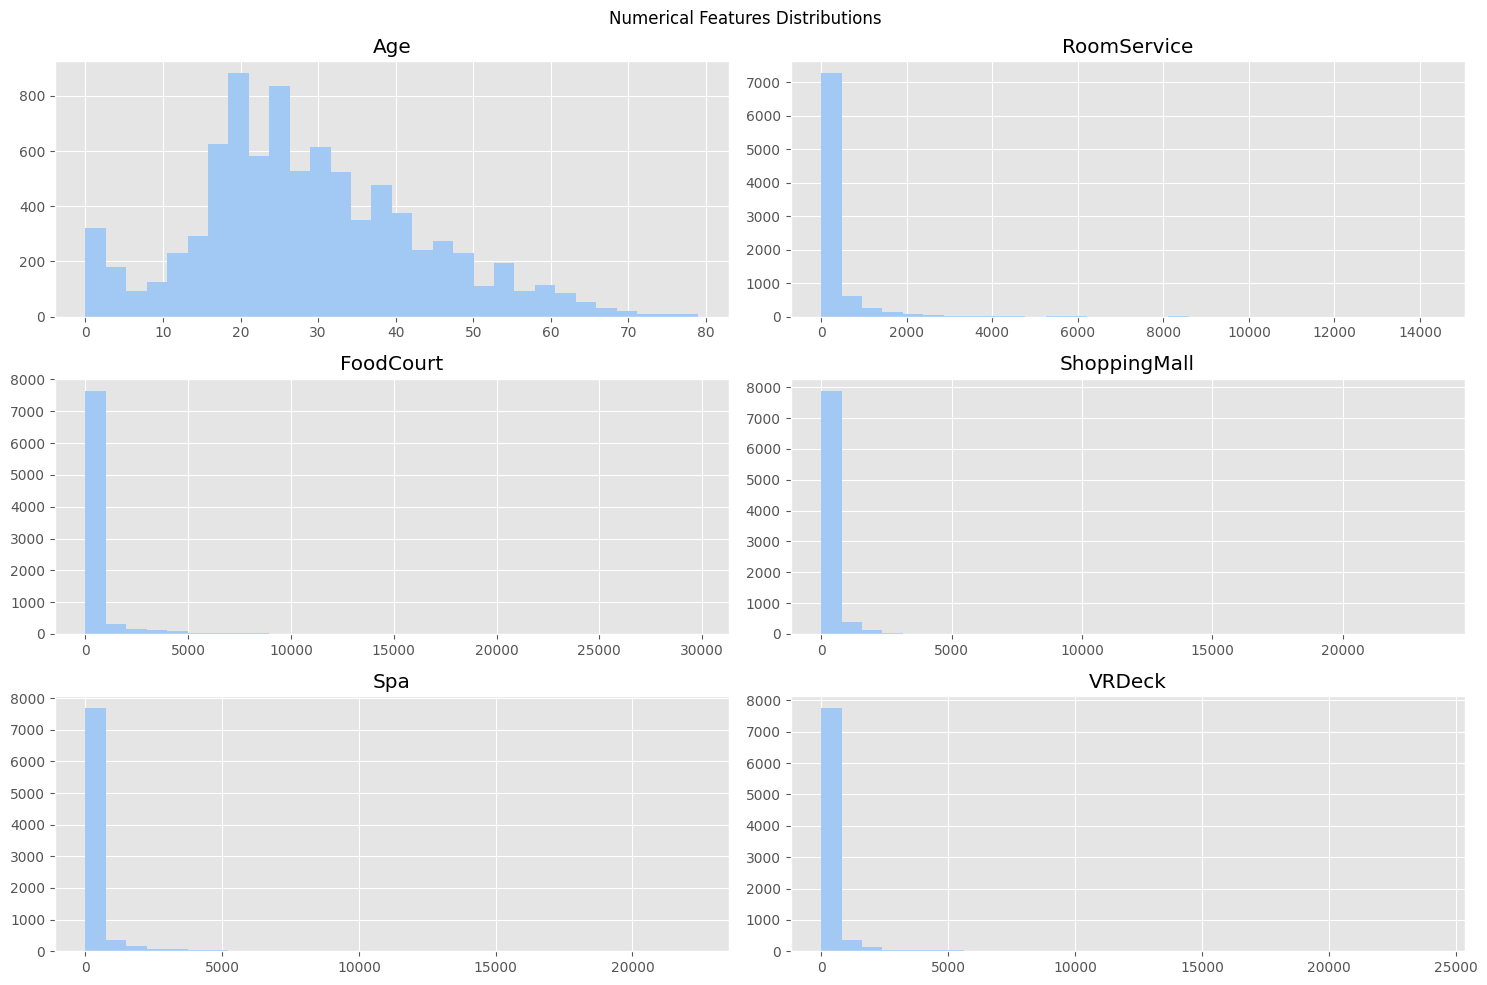

In [12]:
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Numerical Features Distributions")
plt.tight_layout()
plt.show()

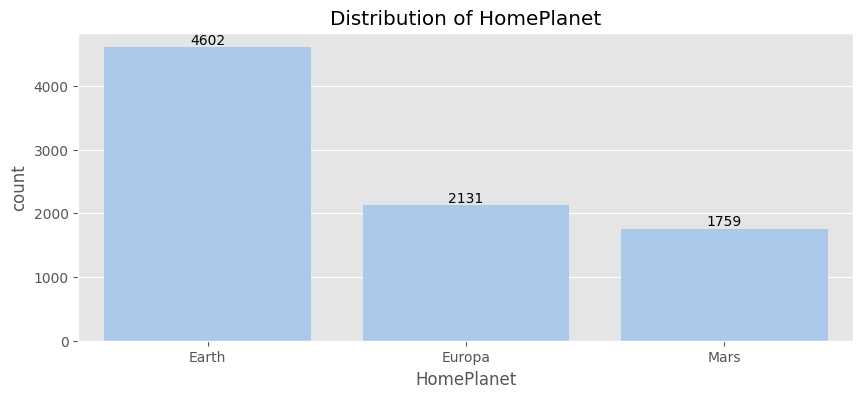

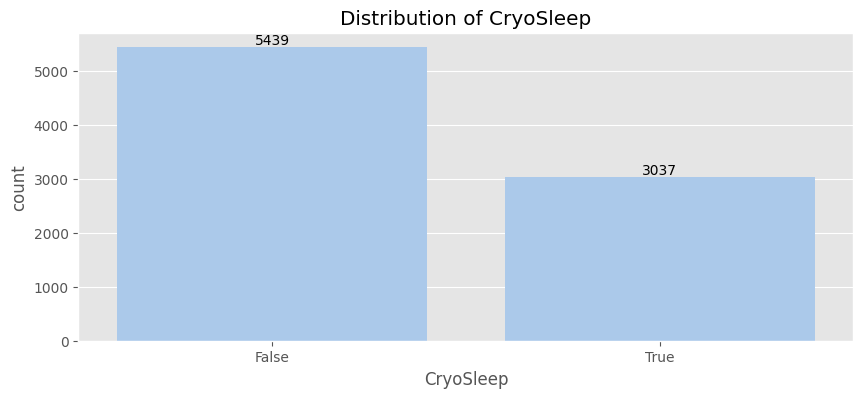

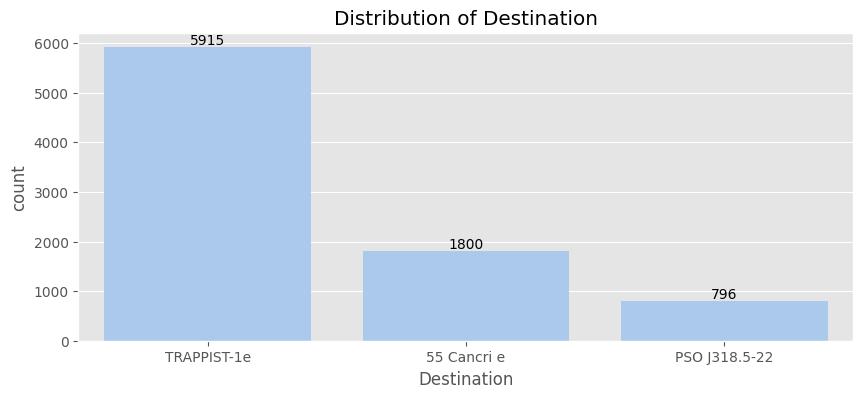

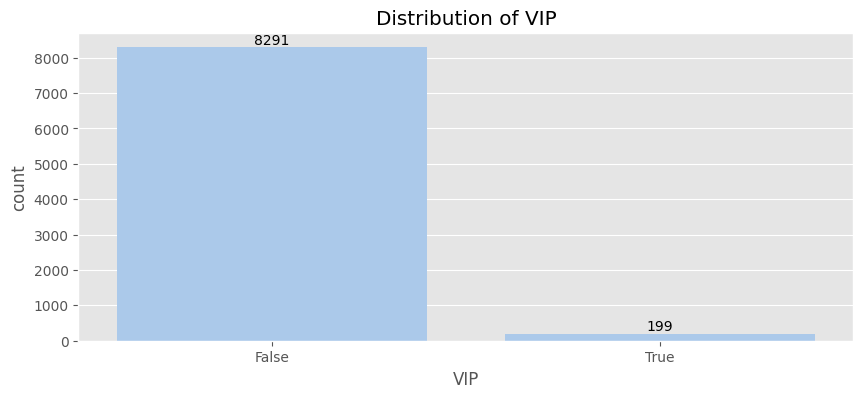

In [18]:
cat_cols = train_df.select_dtypes(include=['object', 'bool']).columns.drop('Transported')
for col in cat_cols:
    if train_df[col].nunique() < 15:  # Avoid columns with too many categories
        plt.figure(figsize=(10, 4))
        sns.countplot(x=col, data=train_df, order=train_df[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.bar_label(plt.gca().containers[0], label_type='edge')

        # plt.xticks(rotation=45)
        plt.show()

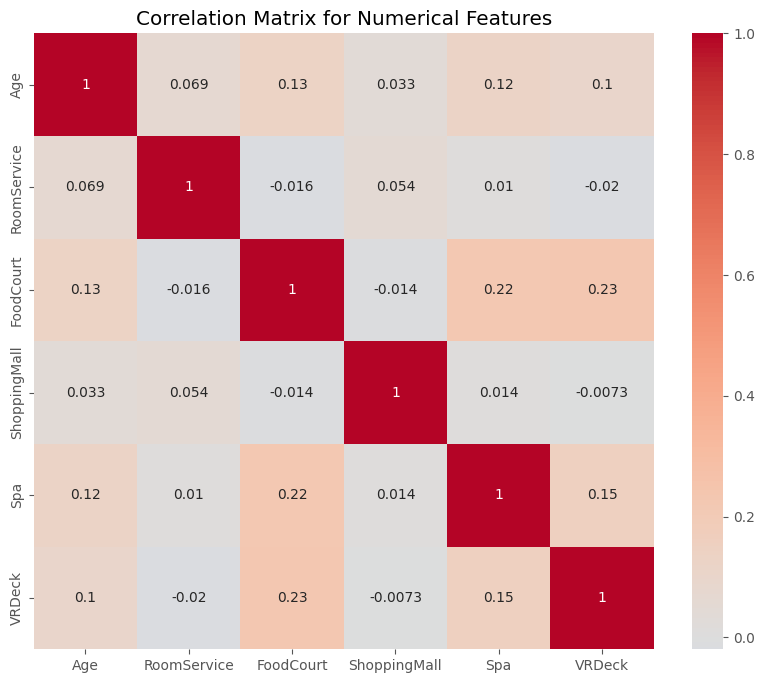

In [19]:
corr_matrix = train_df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

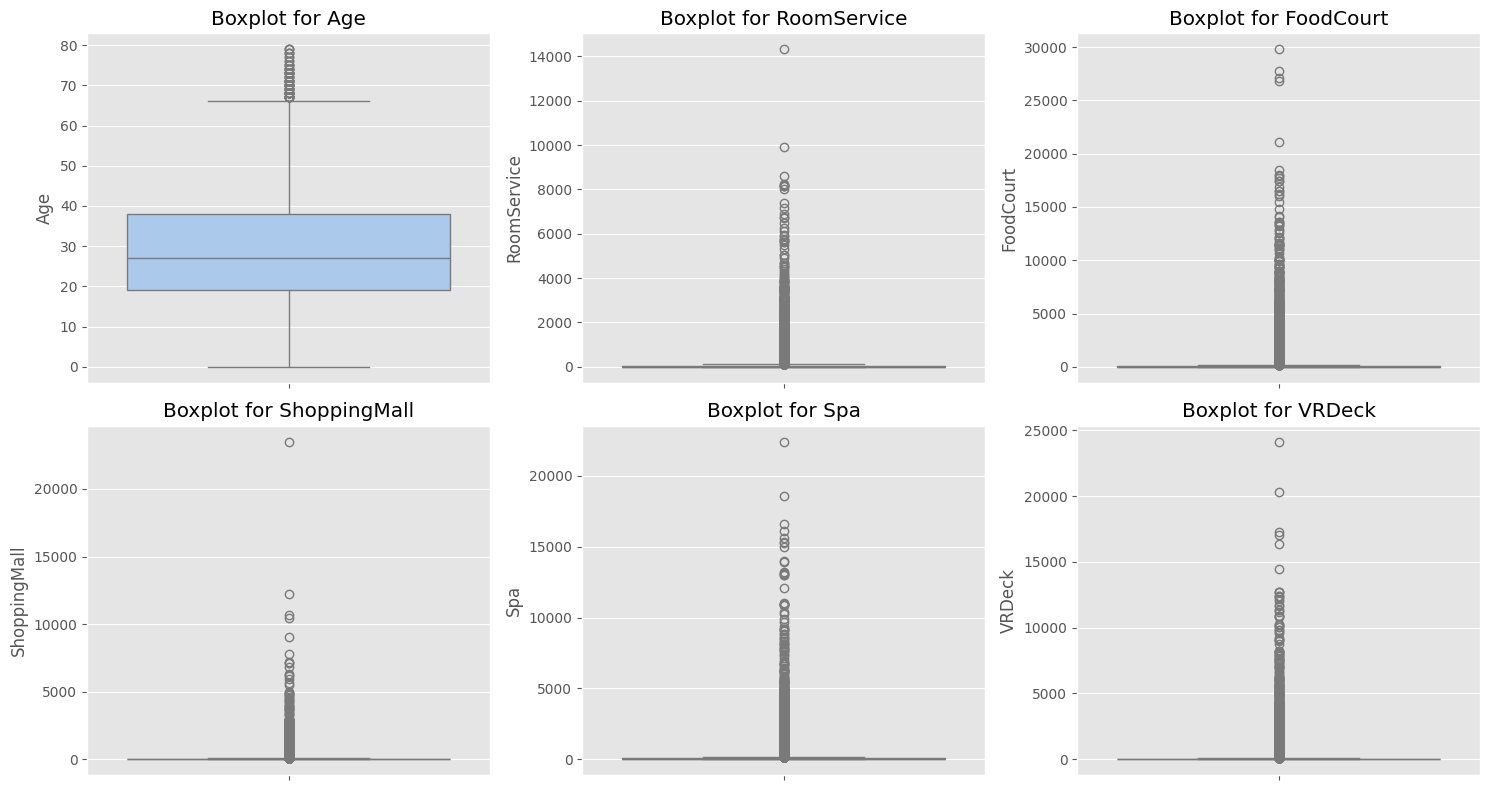

In [20]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=train_df[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

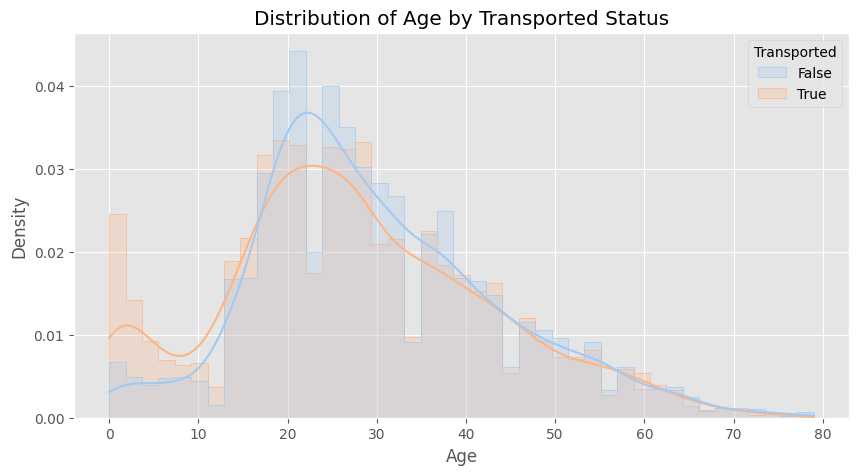

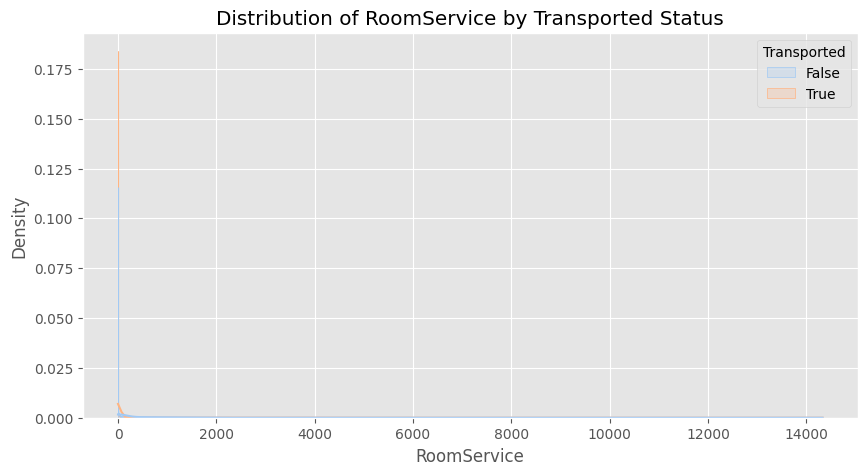

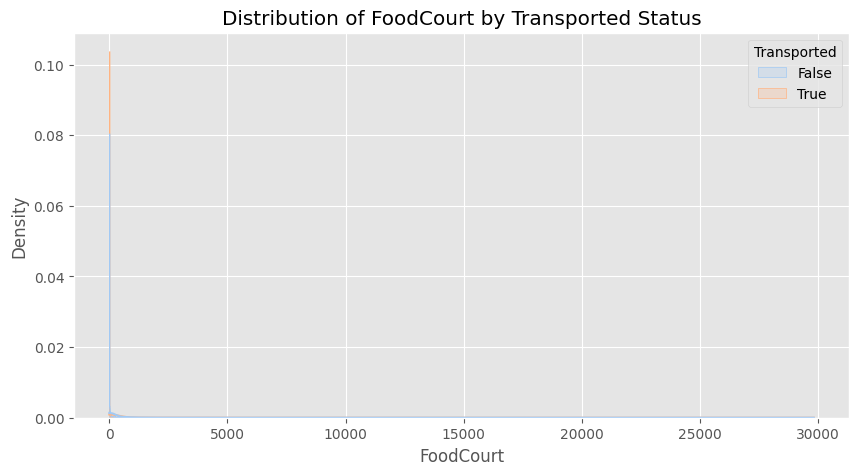

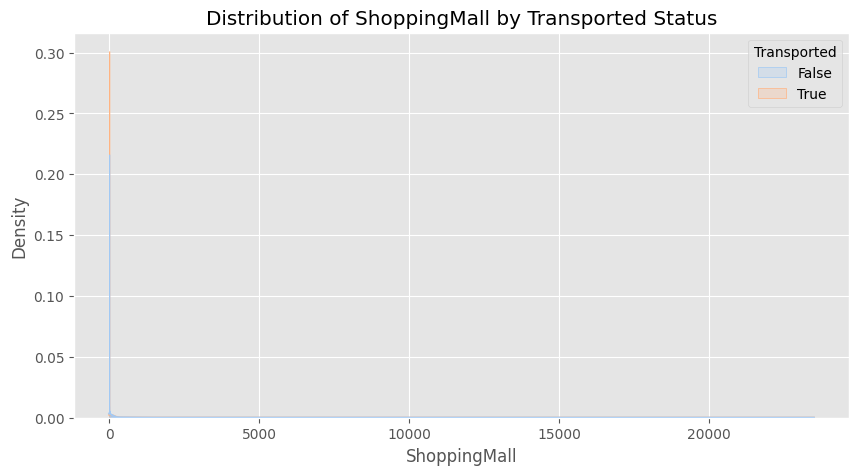

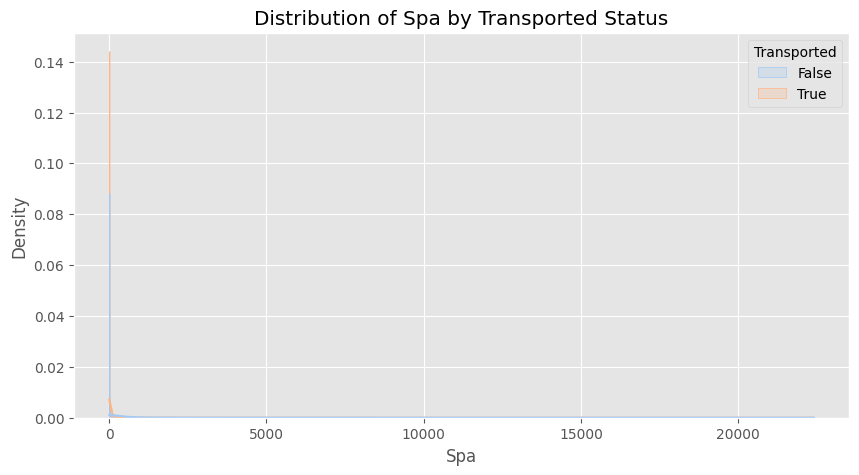

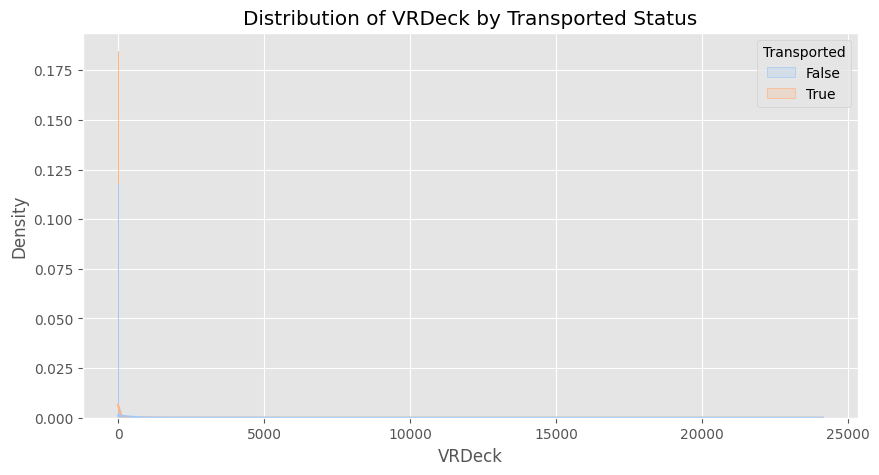

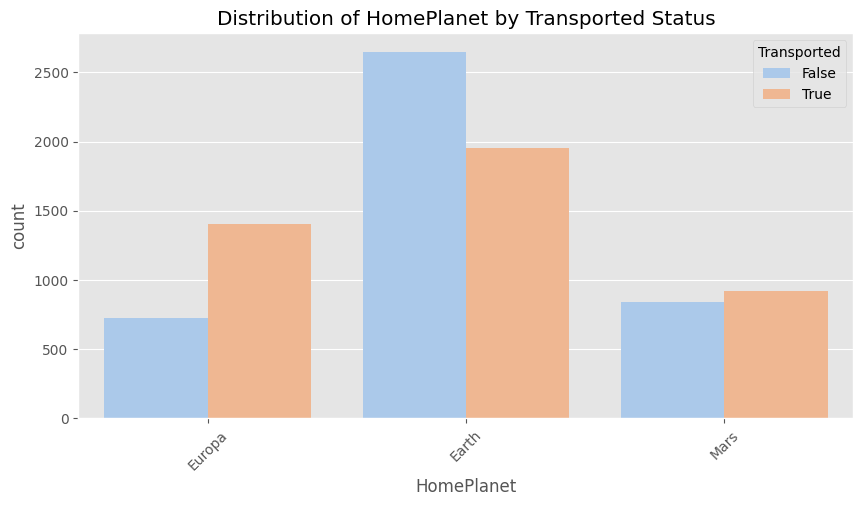

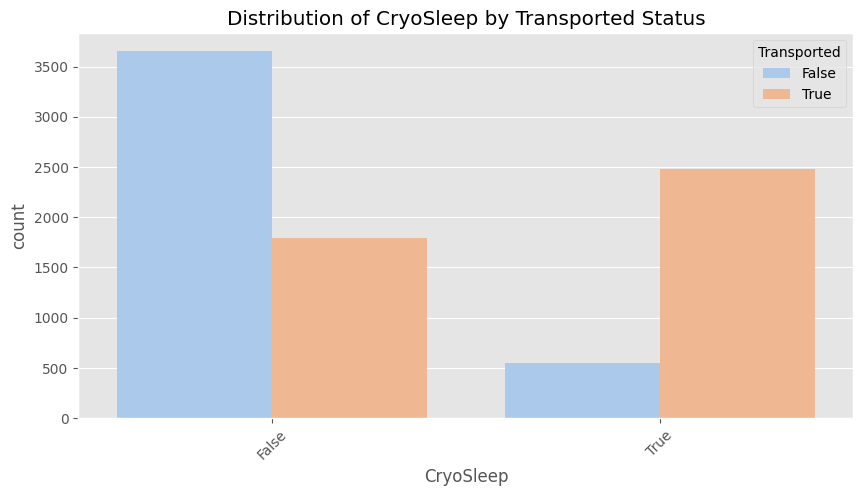

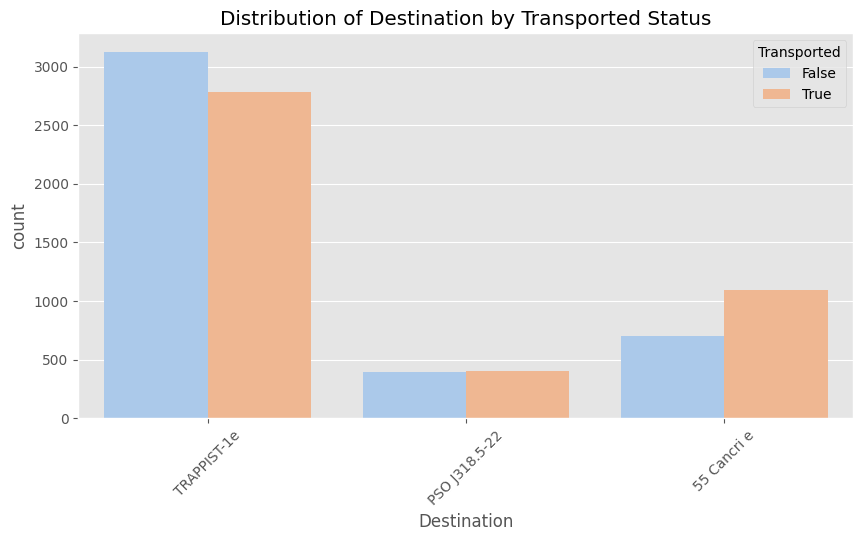

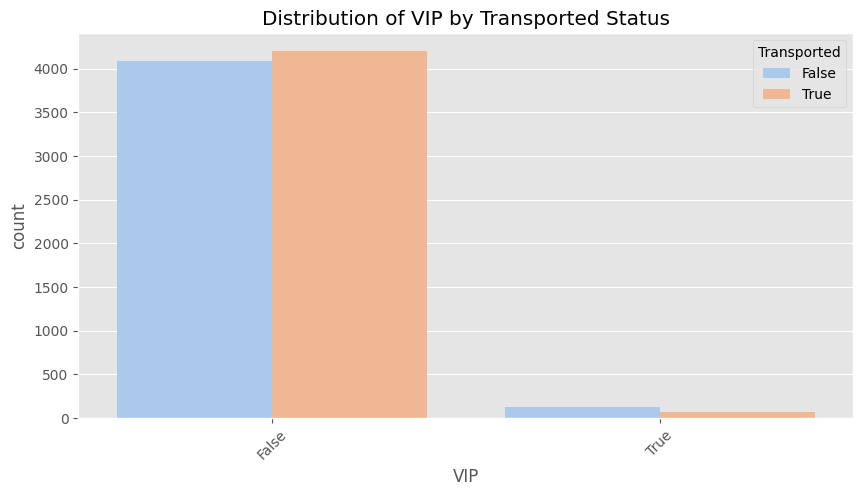

In [21]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=train_df, x=col, hue='Transported', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f"Distribution of {col} by Transported Status")
    plt.show()

for col in cat_cols:
    if train_df[col].nunique() < 10:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=train_df, x=col, hue='Transported')
        plt.title(f"Distribution of {col} by Transported Status")
        plt.xticks(rotation=45)
        plt.show()

In [22]:
print("\nUnique values in categorical features:")
for col in cat_cols:
    print(f"{col}: {train_df[col].nunique()} unique values")
    if train_df[col].nunique() < 15:
        print(train_df[col].value_counts(dropna=False))
        print()


Unique values in categorical features:
PassengerId: 8693 unique values
HomePlanet: 3 unique values
HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64

CryoSleep: 2 unique values
CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64

Cabin: 6560 unique values
Destination: 3 unique values
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: count, dtype: int64

VIP: 2 unique values
VIP
False    8291
NaN       203
True      199
Name: count, dtype: int64

Name: 8473 unique values


In [23]:
# Check for inconsistencies in categorical variables
for col in cat_cols:
    if train_df[col].dtype == 'object':
        print(f"\nUnique values in {col}:")
        print(train_df[col].unique())

# Check for impossible values in numerical variables
for col in num_cols:
    print(f"\nRange of {col}:")
    print(f"Min: {train_df[col].min()}, Max: {train_df[col].max()}")


Unique values in PassengerId:
['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']

Unique values in HomePlanet:
['Europa' 'Earth' 'Mars' nan]

Unique values in CryoSleep:
[False True nan]

Unique values in Cabin:
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']

Unique values in Destination:
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]

Unique values in VIP:
[False True nan]

Unique values in Name:
['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']

Range of Age:
Min: 0.0, Max: 79.0

Range of RoomService:
Min: 0.0, Max: 14327.0

Range of FoodCourt:
Min: 0.0, Max: 29813.0

Range of ShoppingMall:
Min: 0.0, Max: 23492.0

Range of Spa:
Min: 0.0, Max: 22408.0

Range of VRDeck:
Min: 0.0, Max: 24133.0


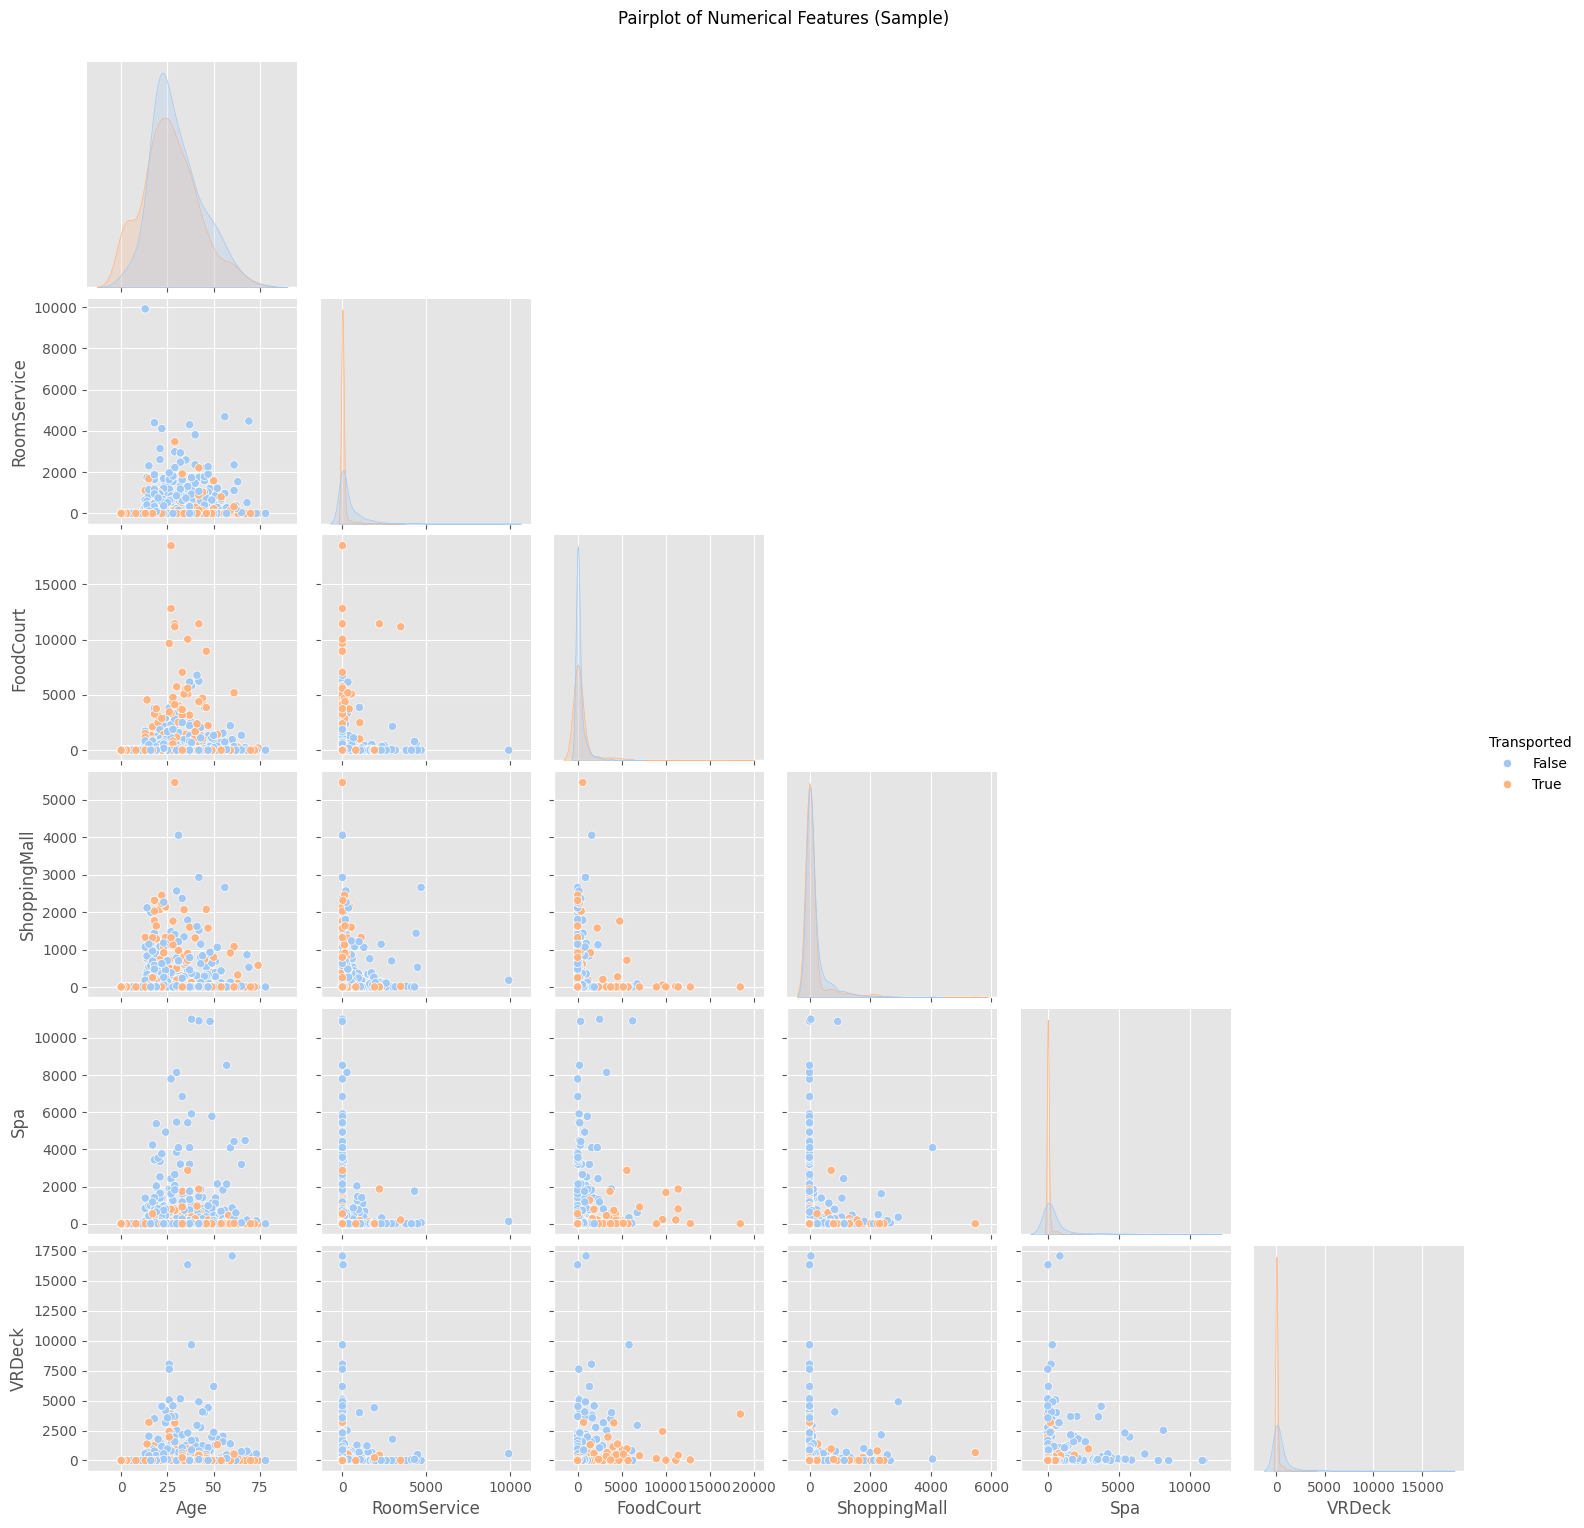

In [24]:
sample_df = train_df.sample(1000)
sns.pairplot(sample_df, vars=num_cols, hue='Transported', corner=True)
plt.suptitle("Pairplot of Numerical Features (Sample)", y=1.02)
plt.show()

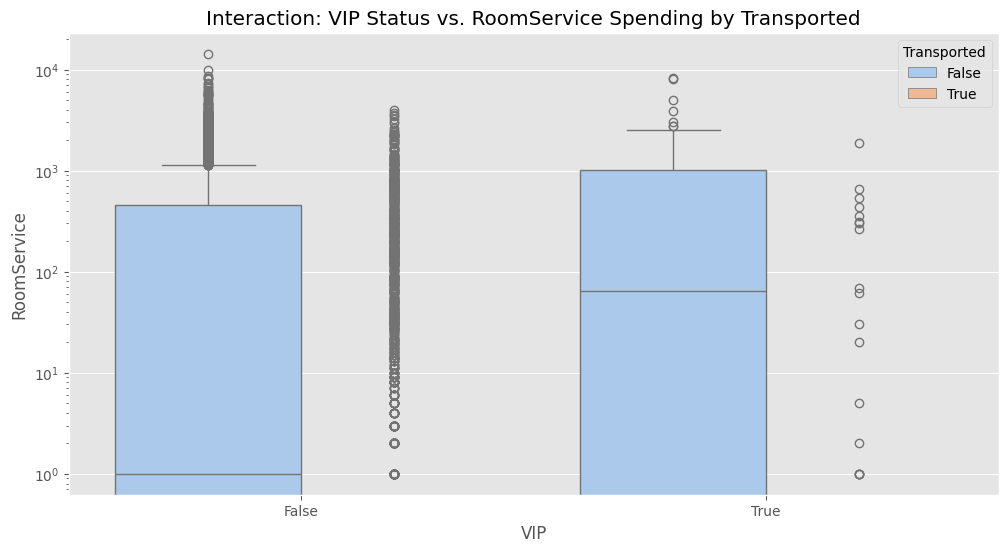

In [25]:
if 'VIP' in train_df.columns and 'RoomService' in train_df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=train_df, x='VIP', y='RoomService', hue='Transported')
    plt.yscale('log')  # Due to extreme outliers
    plt.title("Interaction: VIP Status vs. RoomService Spending by Transported")
    plt.show()

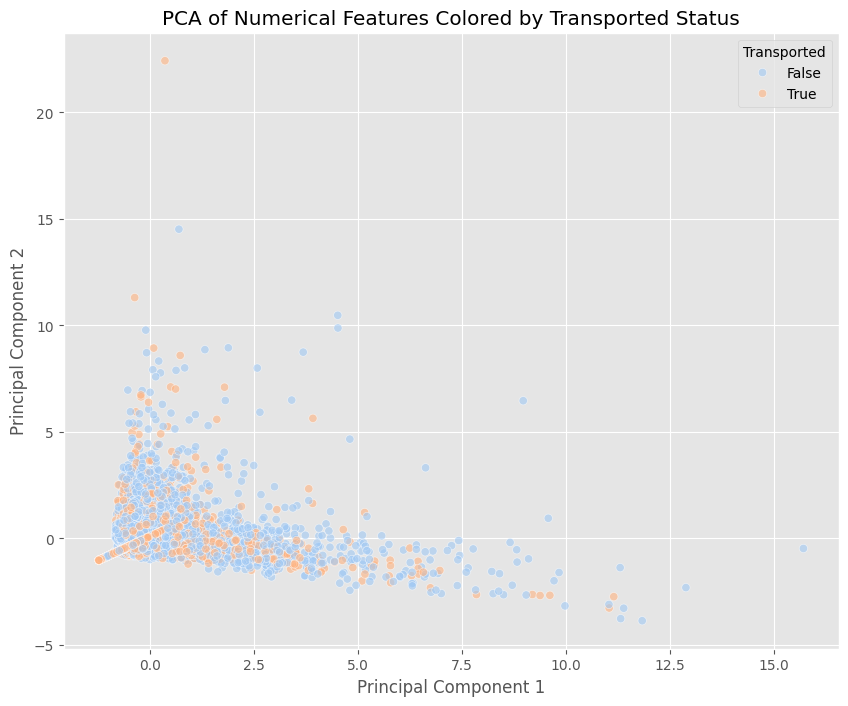

In [26]:
# PCA for numerical features
numerical_data = train_df[num_cols].fillna(train_df[num_cols].median())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], 
                hue=train_df['Transported'], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA of Numerical Features Colored by Transported Status")
plt.show()

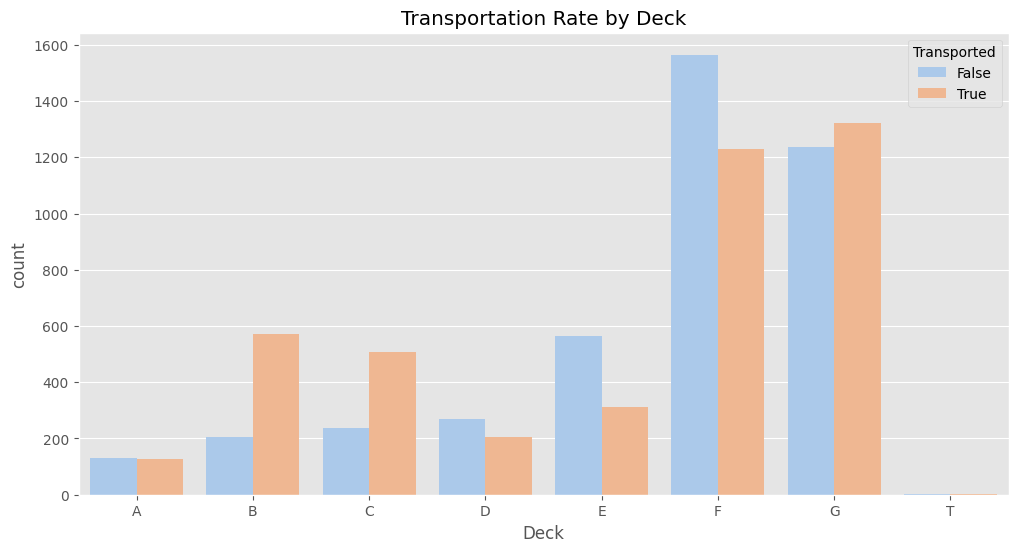

In [27]:
# Extract features from PassengerId and Cabin if they contain temporal info
# Example: Extract deck from Cabin
train_df['Deck'] = train_df['Cabin'].str.split('/').str[0]
if 'Deck' in train_df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=train_df, x='Deck', hue='Transported', order=sorted(train_df['Deck'].dropna().unique()))
    plt.title("Transportation Rate by Deck")
    plt.show()

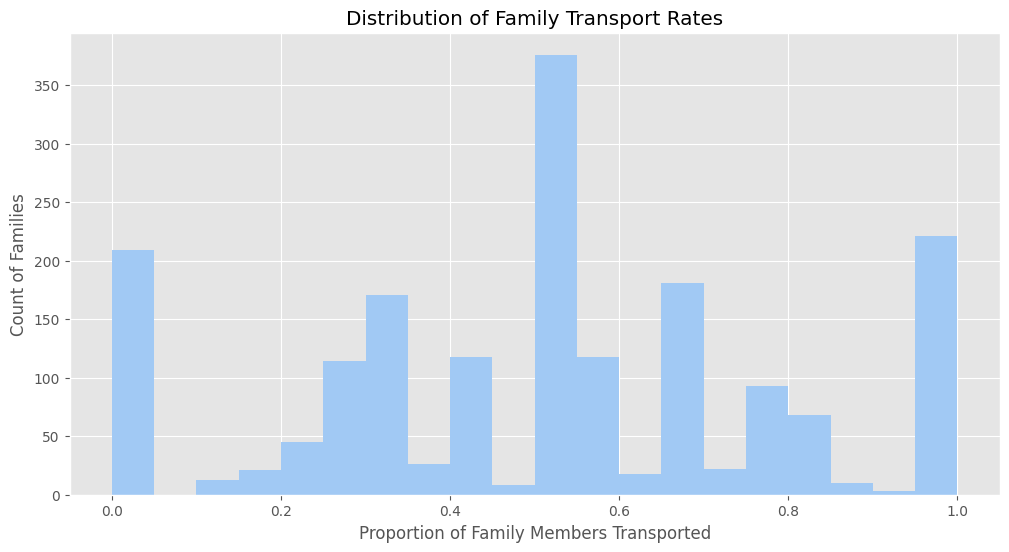

In [28]:
# Name field analysis - extract surname and see if families were transported together
train_df['Surname'] = train_df['Name'].str.split().str[-1]
if 'Surname' in train_df.columns:
    surname_counts = train_df['Surname'].value_counts()
    common_surnames = surname_counts[surname_counts > 1].index
    
    family_df = train_df[train_df['Surname'].isin(common_surnames)].sort_values('Surname')
    family_transport = family_df.groupby('Surname')['Transported'].mean()
    
    plt.figure(figsize=(12, 6))
    family_transport.hist(bins=20)
    plt.xlabel("Proportion of Family Members Transported")
    plt.ylabel("Count of Families")
    plt.title("Distribution of Family Transport Rates")
    plt.show()